<a href="https://colab.research.google.com/github/JuniorSteve770/PYTHON/blob/main/BackTesting_Crypto_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RiskfolioLib Backtesting Library

In [ ]:
# Here we install the Riskfolio Library
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Here we import our Libraries

import pandas as pd
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Here we import the Dataset (list of 3 Crypto_assets)

start = "2019-01-01"
end = "2022-01-01"

assets = ["BTC-USD", "ETH-USD", "LTC-USD"]
data = yf.download(assets, start = start, end = end)

[*********************100%***********************]  3 of 3 completed


In [ ]:
# here we print our dataset
data.head(10)

Adj Close                               Close              \
                BTC-USD     ETH-USD    LTC-USD      BTC-USD     ETH-USD   
Date                                                                      
2019-01-01  3843.520020  140.819412  31.979931  3843.520020  140.819412   
2019-01-02  3943.409424  155.047684  33.433681  3943.409424  155.047684   
2019-01-03  3836.741211  149.135010  32.026699  3836.741211  149.135010   
2019-01-04  3857.717529  154.581940  32.404167  3857.717529  154.581940   
2019-01-05  3845.194580  155.638596  34.936867  3845.194580  155.638596   
2019-01-06  4076.632568  157.746201  39.298855  4076.632568  157.746201   
2019-01-07  4025.248291  151.699219  37.806274  4025.248291  151.699219   
2019-01-08  4030.847900  150.359634  39.479717  4030.847900  150.359634   
2019-01-09  4035.296387  150.803116  38.985535  4035.296387  150.803116   
2019-01-10  3678.924561  128.625183  33.866009  3678.924561  128.625183   

                              High                                 Low  \
              LTC-USD      BTC-USD     ETH-USD    LTC-USD      BTC-USD   
Date                                                                     
2019-01-01  31.979931  3850.913818  141.397507  32.097584  3707.231201   
2019-01-02  33.433681  3947.981201  156.929138  33.793324  3817.409424   
2019-01-03  32.026699  3935.685059  155.863052  33.420704  3826.222900   
2019-01-04  32.404167  3865.934570  156.878983  33.023350  3783.853760   
2019-01-05  34.936867  3904.903076  160.824890  36.143440  3836.900146   
2019-01-06  39.298855  4093.297363  159.371445  39.959141  3826.513184   
2019-01-07  37.806274  4092.613525  158.450424  39.647560  4020.894043   
2019-01-08  39.479717  4109.020996  153.625778  40.950657  3996.955322   
2019-01-09  38.985535  4068.403564  153.622253  40.278614  4022.662842   
2019-01-10  33.866009  4064.066650  152.148270  39.524033  3659.174561   

                                          Open                         \
               ETH-USD    LTC-USD      BTC-USD     ETH-USD    LTC-USD   
Date                                                                    
2019-01-01  132.650711  30.264280  3746.713379  133.418152  30.458393   
2019-01-02  140.650955  31.765974  3849.216309  141.519516  32.021229   
2019-01-03  147.198364  31.592480  3931.048584  155.196045  33.353573   
2019-01-04  147.907104  31.437557  3832.040039  148.912888  32.016525   
2019-01-05  154.337418  32.344795  3851.973877  154.337418  32.345547   
2019-01-06  152.085922  34.784061  3836.519043  155.804230  34.847218   
2019-01-07  151.150726  37.613743  4078.584961  157.809494  39.279751   
2019-01-08  148.669540  37.918991  4028.472168  151.967545  37.918991   
2019-01-09  150.288376  38.902725  4031.552002  150.554688  39.446453   
2019-01-10  126.529373  33.031750  4034.411377  150.843506  38.987137   

                Volume                         
               BTC-USD     ETH-USD    LTC-USD  
Date                                           
2019-01-01  4324200990  2258709868  379429124  
2019-01-02  5244856836  3328240369  414331918  
2019-01-03  4530215219  2676164880  345068249  
2019-01-04  4847965467  3126192535  391010579  
2019-01-05  5137609824  3338211928  640607603  
2019-01-06  5597027440  3231294371  809493170  
2019-01-07  5228625637  2712108388  586891613  
2019-01-08  5306593305  2459808140  643946959  
2019-01-09  5115905225  2369241197  504601883  
2019-01-10  6874143796  3397734456  701124437

In [ ]:
# Here we print the percent change of the closing price sametime removing the Na
price_pch = data["Adj Close"].pct_change().dropna()
price_pch

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2019-01-02,0.025989,0.101039,0.045458
2019-01-03,-0.027050,-0.038135,-0.042083
2019-01-04,0.005467,0.036523,0.011786
2019-01-05,-0.003246,0.006836,0.078160
2019-01-06,0.060189,0.013542,0.124853
...,...,...,...
2021-12-27,-0.003328,-0.007322,-0.000712
2021-12-28,-0.060259,-0.058613,-0.064115
2021-12-29,-0.024042,-0.045348,-0.002565


## Argumenys of out library method
* method_mu is to specify how to calculate the mean of the assset return
* method_cov is to specify how to calculate the covariance
* method_kurt is how to calculate kurtosis
* d= 0.94 stands for 94 confidence interval estimation
* rm = is for risk model (MV for standart deviation, and asume that variance and risk are samething or equal)
* obj = 'Sharpe' obj is objective function, sharpe maximise the sharpe ratio of the portofolio
* rf = risk free rate
* l = risk avertion factor used for utility, objectif function

In [ ]:
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0
l= 0

## we start our Optimisation

In [ ]:
port = rp.Portfolio(returns = price_pch)
port.assets_stats(method_mu = method_mu, method_cov=method_cov)
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf, l=l, hist = hist)
w

,weights
BTC-USD,3.566494e-01
ETH-USD,6.433506e-01
LTC-USD,3.646937e-08


## * Plotting (Portofolio, Min_Risk, Max_Return, Efficient Frontiere)

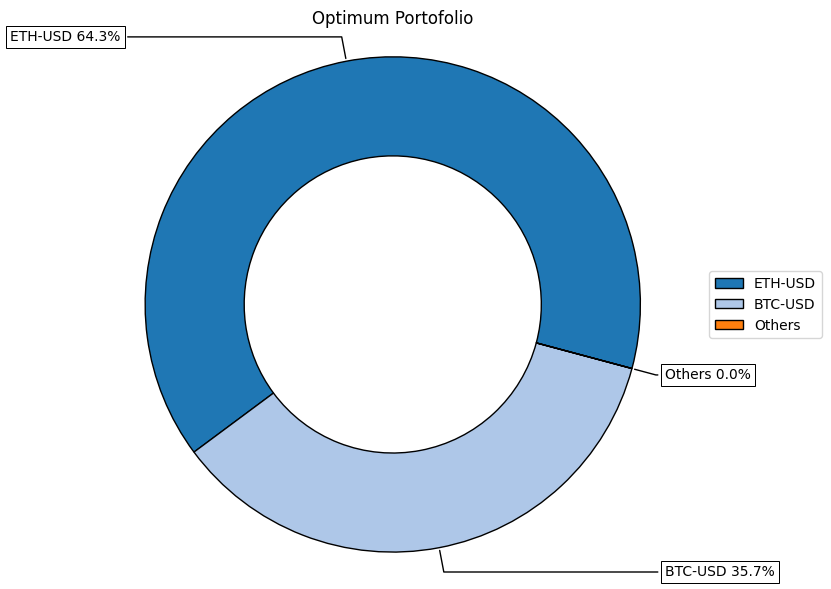

In [ ]:
ax=rp.plot_pie(w=w, title = 'Optimum Portofolio', others=0.05, cmap = 'tab20')
plt.show;

## Here we Minimise Risk and do a second Plot
* obj = 'Minrisk' to minimise risk
* obj = 'MaxRet' to plot the maximum Return

In [ ]:
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'MaxRet'
rf = 0
l= 0

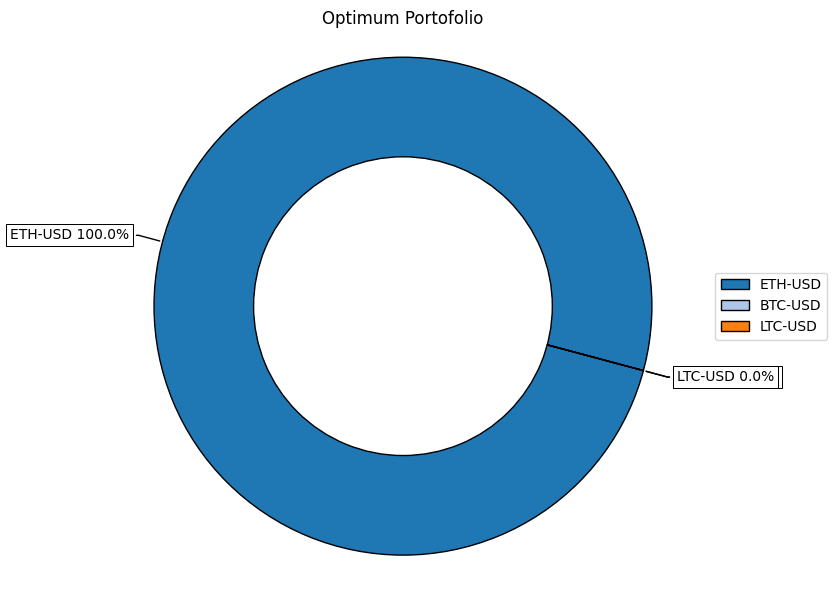

In [ ]:
port = rp.Portfolio(returns = price_pch)
port.assets_stats(method_mu = method_mu, method_cov=method_cov)
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf, l=l, hist = hist)
ax=rp.plot_pie(w=w, title = 'Optimum Portofolio', others=0.05, cmap = 'tab20')
plt.show;

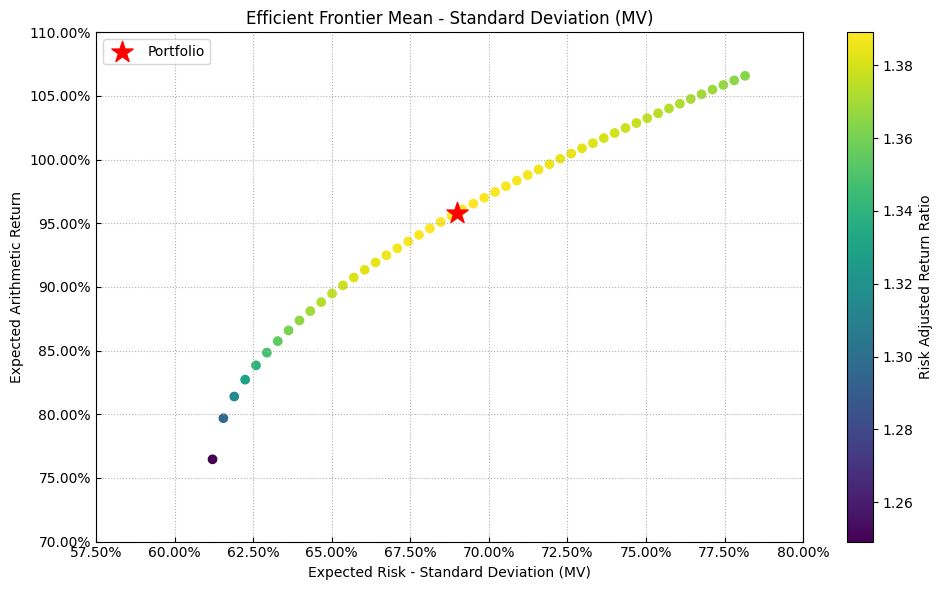

In [ ]:
# Efficient Frontiere
# we set our risk metric on standart deviation
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0
l= 0
# we build our Optimisation
port = rp.Portfolio(returns = price_pch)
port.assets_stats(method_mu = method_mu, method_cov=method_cov)
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf, l=l, hist = hist)
# We build our Efficient Frontiere
frontier = port.efficient_frontier(model = model, rm=rm, points = 50, rf=rf, hist=hist)
ax = rp.plot_frontier(w_frontier=frontier, mu=port.mu, cov=port.cov, returns = price_pch, rm=rm, rf = rf, cmap = 'viridis', w=w)
plt.show();

In [ ]:
# we print our frontiere table
frontier

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
BTC-USD,1.000000e+00,8.926580e-01,8.362040e-01,7.922756e-01,7.549397e-01,7.218379e-01,6.917471e-01,6.639360e-01,6.379274e-01,6.133877e-01,...,1.103456e-01,9.767552e-02,8.511720e-02,7.266622e-02,6.031833e-02,4.806999e-02,3.591732e-02,2.385689e-02,1.188551e-02,6.969815e-10
ETH-USD,2.004423e-08,1.073420e-01,1.637959e-01,2.077244e-01,2.450603e-01,2.781621e-01,3.082529e-01,3.360639e-01,3.620726e-01,3.866122e-01,...,8.896544e-01,9.023245e-01,9.148828e-01,9.273338e-01,9.396816e-01,9.519300e-01,9.640827e-01,9.761431e-01,9.881145e-01,1.000000e+00
LTC-USD,3.352720e-09,2.655333e-08,5.015317e-09,3.682671e-09,1.648442e-09,1.351628e-09,1.172871e-09,5.075306e-08,1.937360e-08,1.908316e-08,...,6.982488e-09,4.940167e-09,3.032735e-09,1.531176e-09,2.478388e-08,1.296841e-08,6.488818e-09,4.769128e-09,4.795056e-10,5.313433e-10


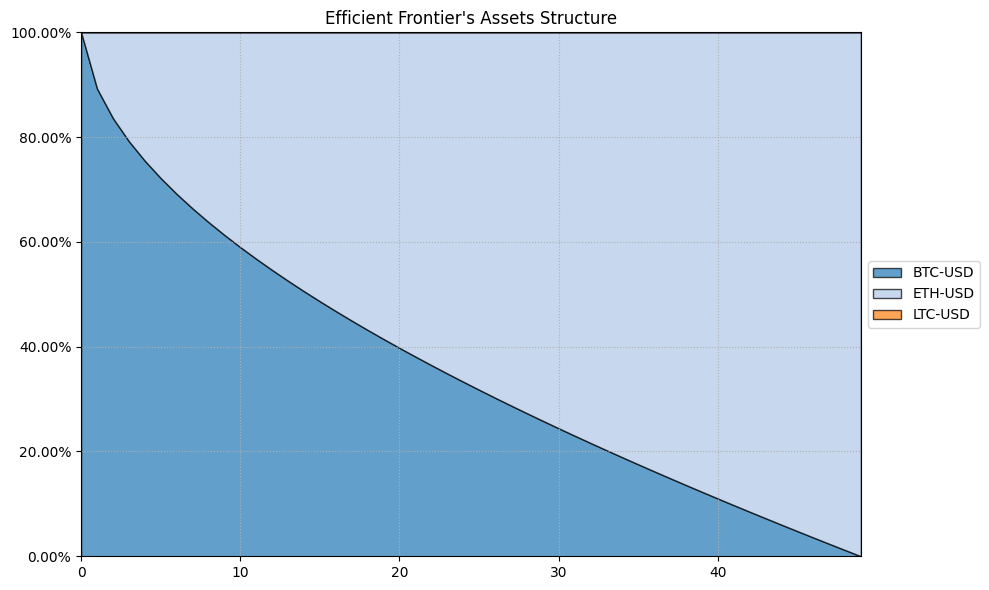

In [ ]:
# Here we plot the risk curve using riskfolio
ax2= rp.plot_frontier_area(w_frontier = frontier, cmap = 'tab20')
plt.show()

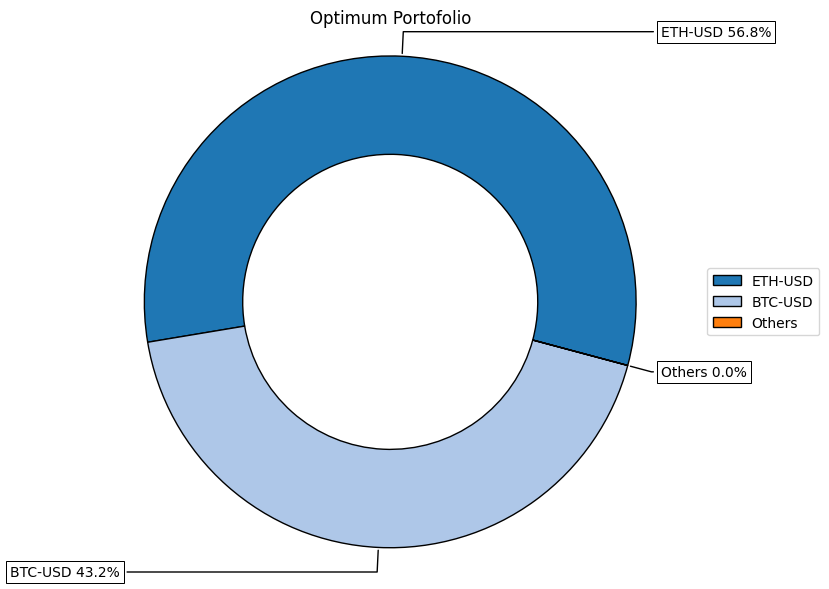

In [ ]:
#here we plot a precise index (number 18) of our frontier table
ax3 = rp.plot_pie(w=pd.DataFrame(frontier[18]), title = "Optimum Portofolio", others=0.05, cmap = 'tab20')
plt.show();

In [ ]:
# jupiter repport on historical return and weight of our protofolio, mean, std, pyxhart, each asset contribution, drawdown + curve,
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0
l= 0
returns = price_pch
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf, l=l, hist = hist)


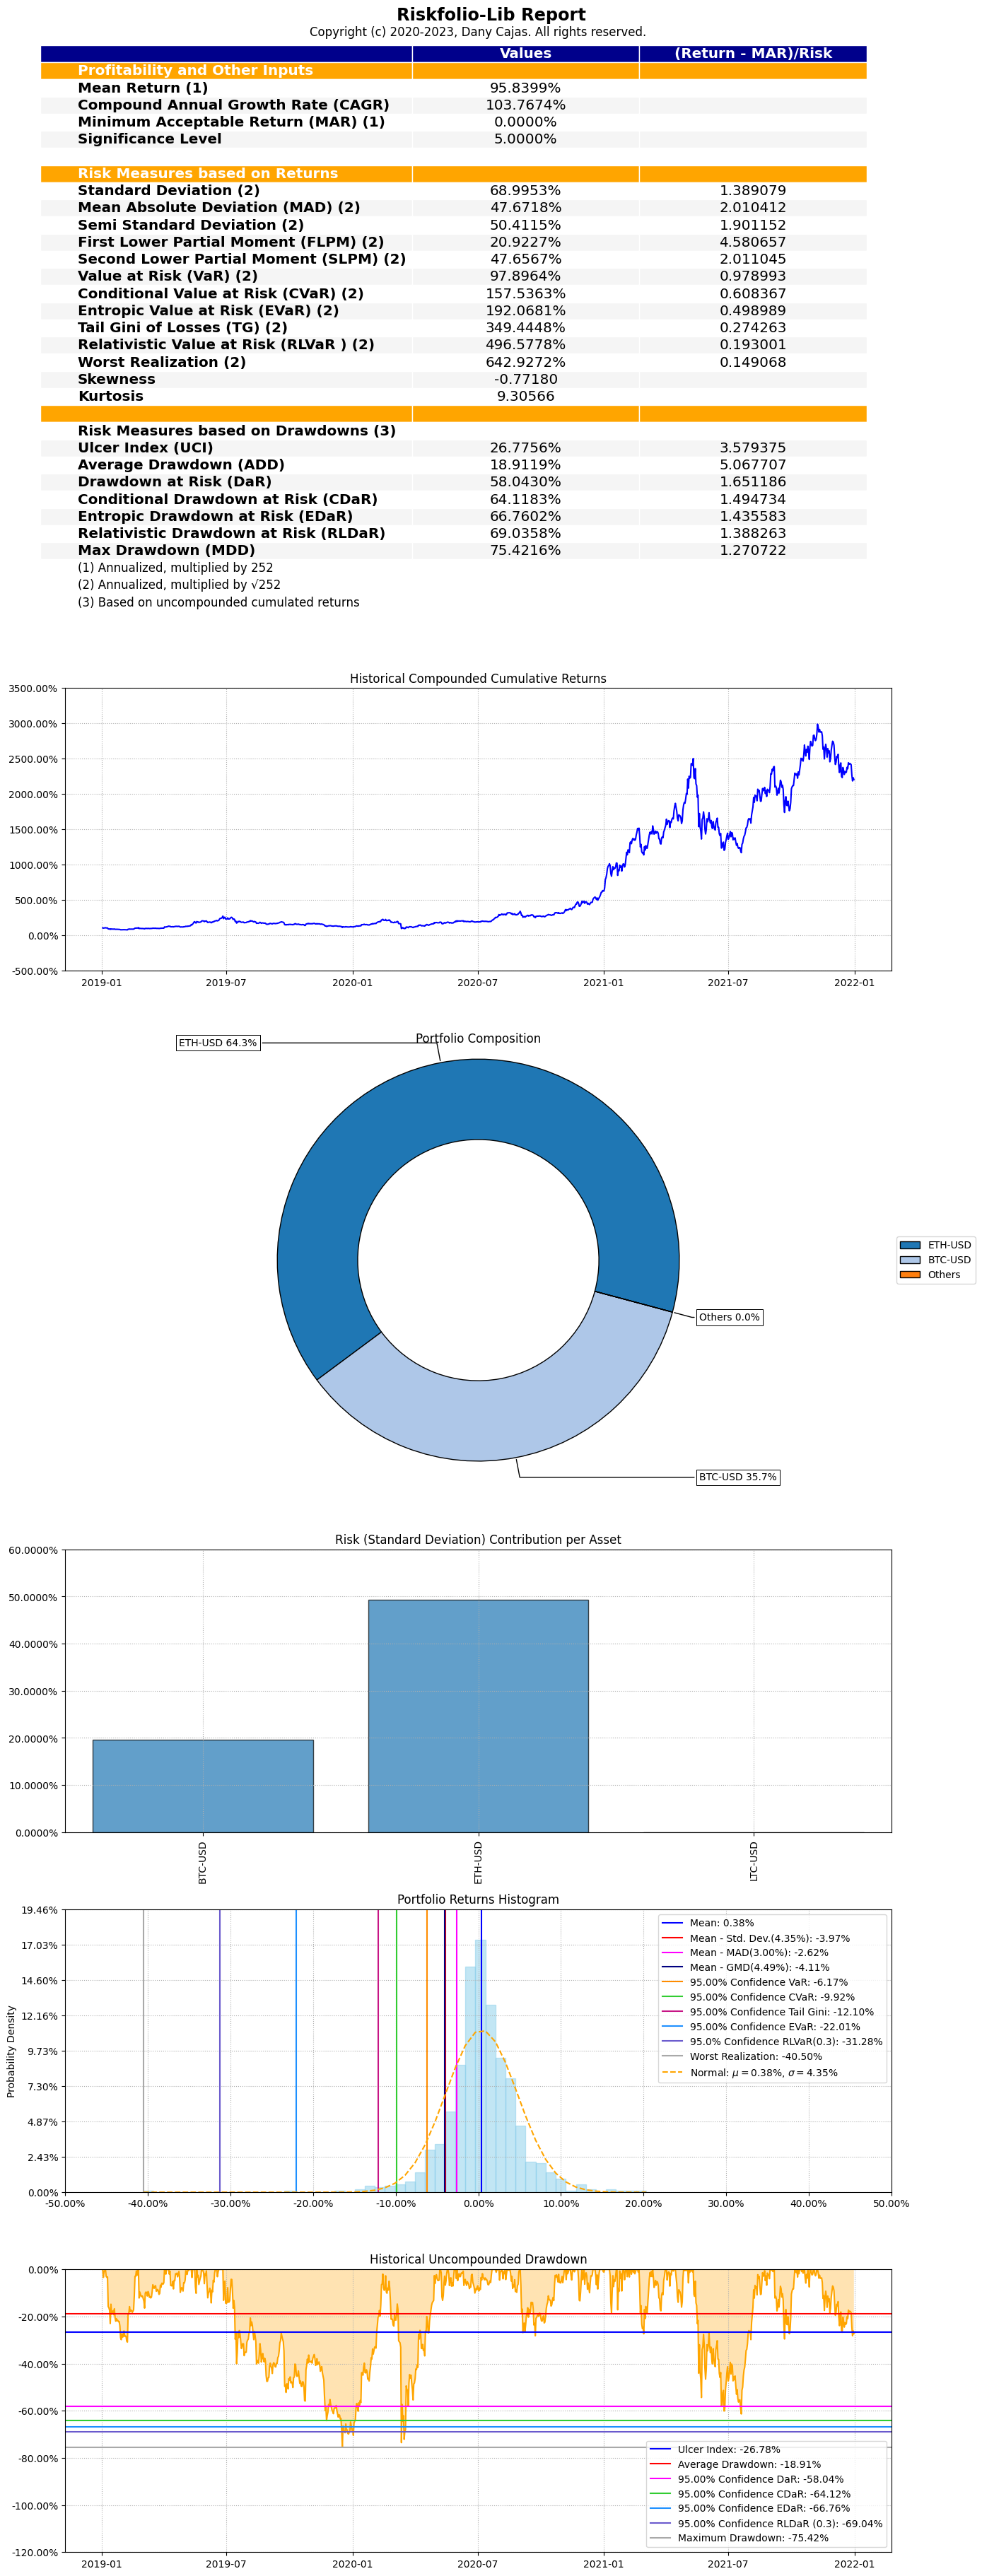

In [ ]:
# report of for the Over-all Portofolio
ax = rp.jupyter_report(returns, w, rm=rm)
plt.show()

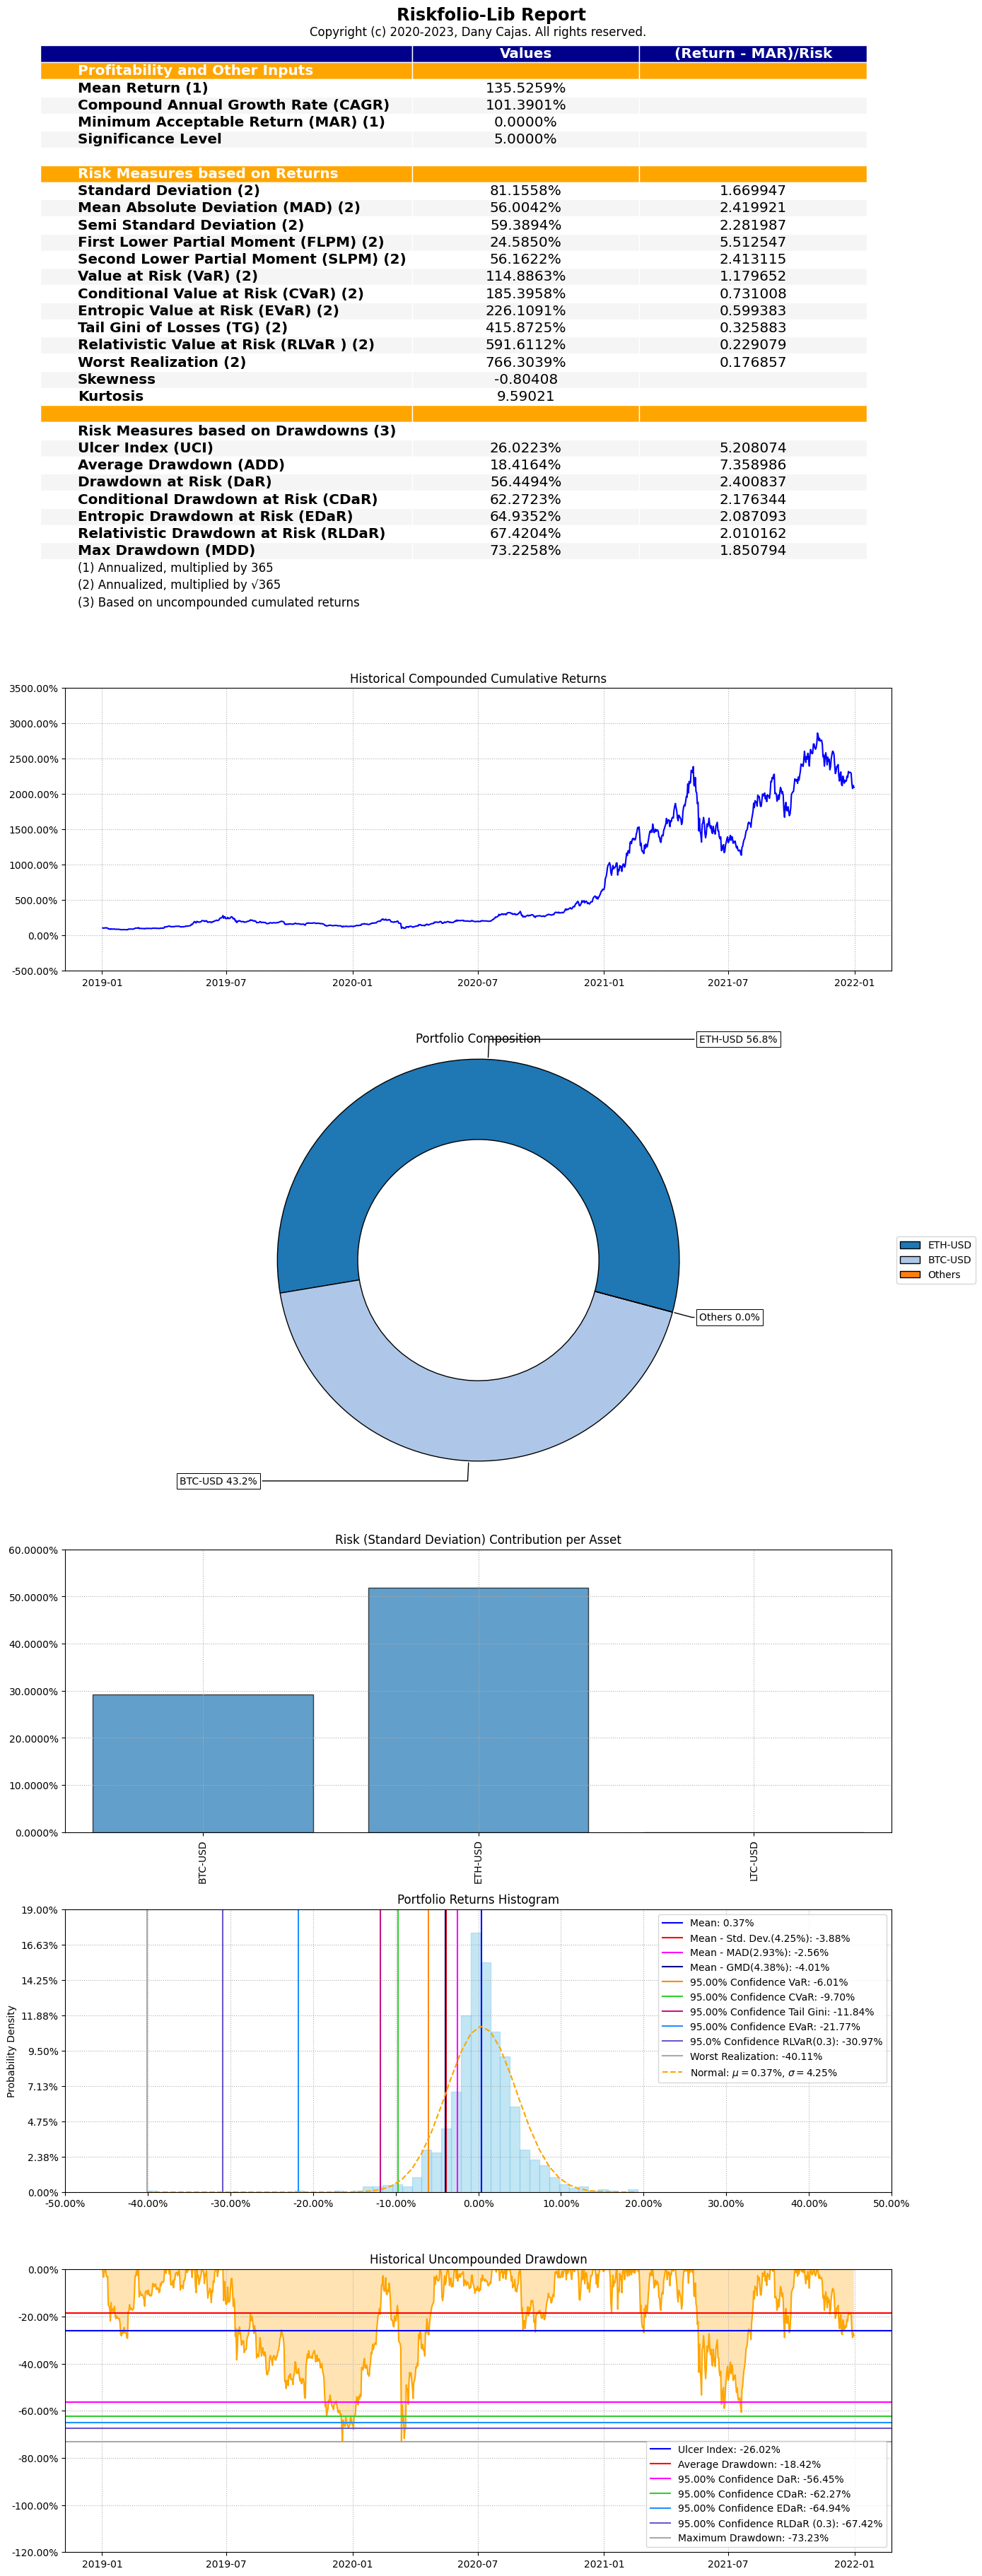

In [ ]:
# report of for the Over-all Portofolio. tfactor =365 is for the 365 trading days of cryptoes
ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 365)
plt.show()

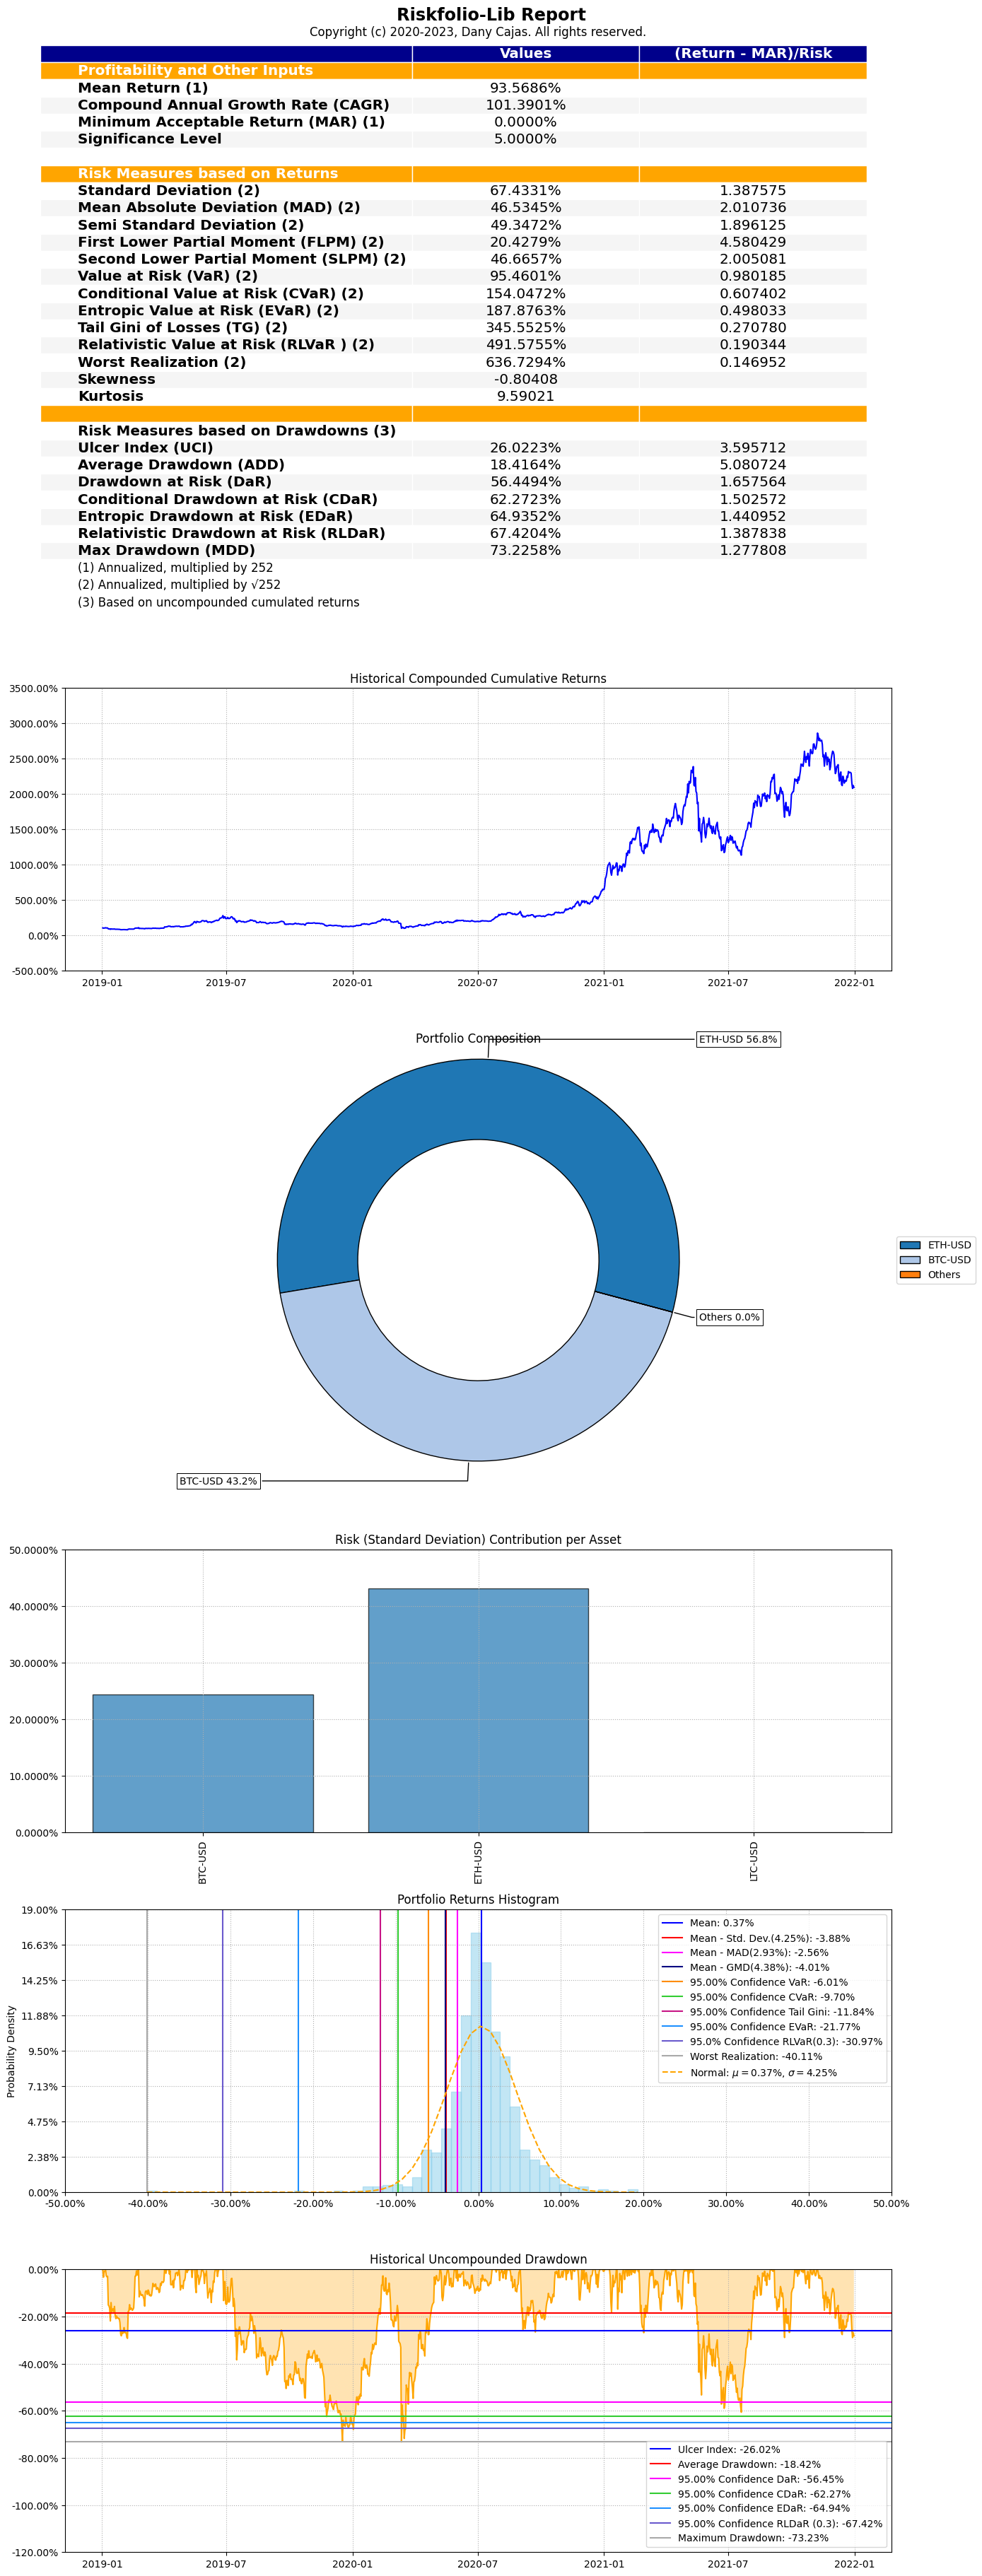

In [ ]:
# report of a precise index (number 18) of our frontier table
w = pd.DataFrame(frontier[18])
returns = price_pch

ax = rp.jupyter_report(returns, w, rm=rm)
plt.show()

In [ ]:
## other Possible Risk measure used values are:
"""
’MV’: Standard Deviation.

’KT’: Square Root Kurtosis.

’MAD’: Mean Absolute Deviation.

’GMD’: Gini Mean Difference.

’MSV’: Semi Standard Deviation.

’SKT’: Square Root Semi Kurtosis.

’FLPM’: First Lower Partial Moment (Omega Ratio).

’SLPM’: Second Lower Partial Moment (Sortino Ratio).

’VaR’: Value at Risk.

’CVaR’: Conditional Value at Risk.

’TG’: Tail Gini.

’EVaR’: Entropic Value at Risk.

’RLVaR’: Relativistic Value at Risk. I recommend only use this function with MOSEK solver.

’WR’: Worst Realization (Minimax).

’RG’: Range of returns.

’CVRG’: CVaR range of returns.

’TGRG’: Tail Gini range of returns.

’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).

’ADD’: Average Drawdown of uncompounded cumulative returns.

’DaR’: Drawdown at Risk of uncompounded cumulative returns.

’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.

’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.

’RLDaR’: Relativistic Drawdown at Risk of uncompounded cumulative returns. I recommend only use this risk measure with MOSEK solver.

’UCI’: Ulcer Index of uncompounded cumulative returns.

’MDD_Rel’: Maximum Drawdown of compounded cumulative returns (Calmar Ratio).

’ADD_Rel’: Average Drawdown of compounded cumulative returns.

’CDaR_Rel’: Conditional Drawdown at Risk of compounded cumulative returns.

’EDaR_Rel’: Entropic Drawdown at Risk of compounded cumulative returns.

’RLDaR_Rel’: Relativistic Drawdown at Risk of compounded cumulative returns. I recommend only use this risk measure with MOSEK solver.

’UCI_Rel’: Ulcer Index of compounded cumulative returns.
"""

'\n’MV’: Standard Deviation.\n\n’KT’: Square Root Kurtosis.\n\n’MAD’: Mean Absolute Deviation.\n\n’GMD’: Gini Mean Difference.\n\n’MSV’: Semi Standard Deviation.\n\n’SKT’: Square Root Semi Kurtosis.\n\n’FLPM’: First Lower Partial Moment (Omega Ratio).\n\n’SLPM’: Second Lower Partial Moment (Sortino Ratio).\n\n’VaR’: Value at Risk.\n\n’CVaR’: Conditional Value at Risk.\n\n’TG’: Tail Gini.\n\n’EVaR’: Entropic Value at Risk.\n\n’RLVaR’: Relativistic Value at Risk. I recommend only use this function with MOSEK solver.\n\n’WR’: Worst Realization (Minimax).\n\n’RG’: Range of returns.\n\n’CVRG’: CVaR range of returns.\n\n’TGRG’: Tail Gini range of returns.\n\n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).\n\n’ADD’: Average Drawdown of uncompounded cumulative returns.\n\n’DaR’: Drawdown at Risk of uncompounded cumulative returns.\n\n’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.\n\n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulativ